<a href="https://colab.research.google.com/github/valeria-molino/MachineLearning-PredictiveModeling/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

Data Collection & Analysis

In [80]:
df = pd.read_csv('/content/weatherAUS_rainfall_prediction_dataset_cleaned.csv')
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2010-04-30,Adelaide,10.8,21.2,0.0,1.8,6.60,ENE,22.0,ENE,NW,9.0,7.0,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,No,No
1,2014-07-22,Adelaide,3.7,19.0,0.0,1.4,7.61,N,24.0,N,NNE,0.0,11.0,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,No,No
2,2014-07-23,Adelaide,9.6,15.8,0.0,2.6,7.61,NE,52.0,NNE,NE,9.0,20.0,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,No,Yes
3,2014-07-24,Adelaide,10.1,15.5,16.6,0.8,7.61,NNE,50.0,NW,NW,17.0,26.0,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,Yes,Yes
4,2014-07-25,Adelaide,11.2,16.2,1.8,0.6,7.61,NW,30.0,WNW,WNW,13.0,15.0,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,Yes,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [81]:
# Convert categorical variables into numeric
df = df.drop(['Date'], axis=1)
cat_columns = df.select_dtypes(['object']).columns
# Convert
encoder = LabelEncoder()
for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,10.8,21.2,0.0,1.8,6.60,1,22.0,1,7,9.0,7.0,66.0,48.0,1028.4,1024.7,4.45,4.51,15.7,21.0,0,0
1,0,3.7,19.0,0.0,1.4,7.61,3,24.0,3,5,0.0,11.0,75.0,32.0,1024.2,1021.1,4.45,4.51,9.6,18.5,0,0
2,0,9.6,15.8,0.0,2.6,7.61,4,52.0,5,4,9.0,20.0,35.0,51.0,1017.9,1011.5,4.45,4.51,14.7,15.4,0,1
3,0,10.1,15.5,16.6,0.8,7.61,5,50.0,7,7,17.0,26.0,96.0,80.0,1007.4,1008.0,4.45,4.51,11.2,14.0,1,1
4,0,11.2,16.2,1.8,0.6,7.61,7,30.0,14,14,13.0,15.0,89.0,70.0,1018.4,1019.2,4.45,4.51,13.0,15.3,1,1


In [ ]:
# ADD EDA

Data Pre-Processing

In [82]:
X = df.drop(['RainTomorrow'], axis=1)
y = df.RainTomorrow

Splitting the data to Training data & Test data

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Model Training

In [84]:
model = XGBClassifier()
# Ititialize parameters
grid_params = [{'n_estimators': [50, 100, 150, 200, 250],
                'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                'max_depth': [10, 15, 20, 25, 30],
                'gamma': [0, 1, 2, 3],
                'lambda': [0, 0.5, 1, 1,5],
                'subsample': [0.3, 0.5, 0.7],
                'colsample_bytree': [0.3, 0.5, 0.7]}]

In [85]:
# Hyperparameter Tuning with Random Search
rand_search = RandomizedSearchCV(estimator=model,
                                 param_distributions=grid_params,
                                 n_iter=25,
                                 n_jobs=-1,
                                 scoring='roc_auc',
                                 cv=3,
                                 verbose=1)
rand_search.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions=[{'colsample_bytree': [0.3, 0.5, 0.7],
                                         'gamma': [0, 1, 2, 3],
                                         'lambda': [0, 0.5, 1, 1, 5],
                                         'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                           0.25, 0.3],
                                         'max_depth': [10, 15, 20, 25, 30],
                                         'n_estimators': [50, 100, 150, 200,
                                                          250],
                                         'subsample': [0.3, 0.5, 0.7]}],
                   scoring='roc_auc', verbose=1)

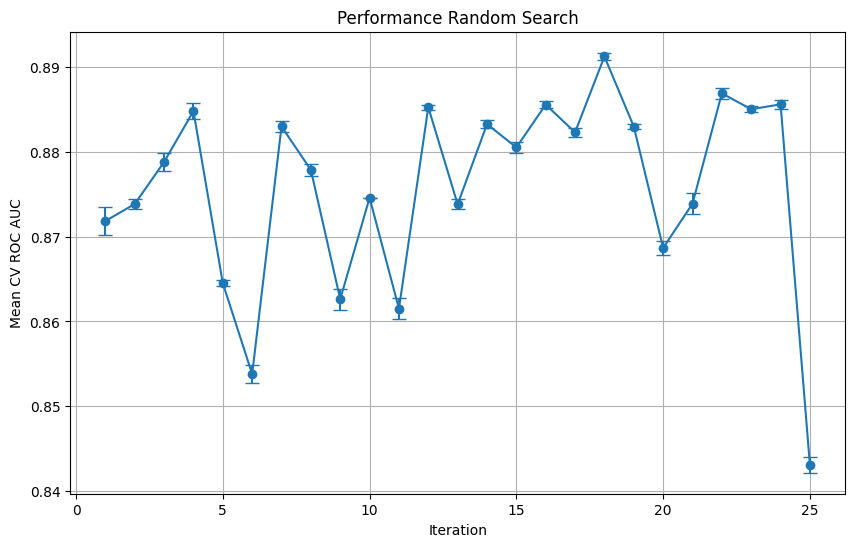

In [86]:
results_rand_search = pd.DataFrame(rand_search.cv_results_)
mean_scores_rand_search = results_rand_search['mean_test_score']
std_scores_rand_search = results_rand_search['std_test_score']

plt.figure(figsize=(10,6))
plt.errorbar(range(1, len(mean_scores_rand_search)+1), mean_scores_rand_search, yerr=std_scores_rand_search, fmt='o-', capsize=5)
plt.xlabel('Iteration')
plt.ylabel('Mean CV ROC AUC')
plt.title('Performance Random Search')
plt.grid(True)
plt.show()

In [87]:
# Select the best model and their parameters
print("Best parameters:", rand_search.best_params_)
print("Best cross-val accuracy:", rand_search.best_score_)
best_model_rand_search = rand_search.best_estimator_

Best parameters: {'subsample': 0.5, 'n_estimators': 250, 'max_depth': 15, 'learning_rate': 0.05, 'lambda': 5, 'gamma': 0, 'colsample_bytree': 0.5}
Best cross-val accuracy: 0.8912300295810129


Model Evaluation

In [88]:
y_predict = best_model_rand_search.predict(X_test)
accuracy_score = accuracy_score(y_test, y_predict)
print("Best cross-val accuracy:", accuracy_score)

Best cross-val accuracy: 0.8582771896053898


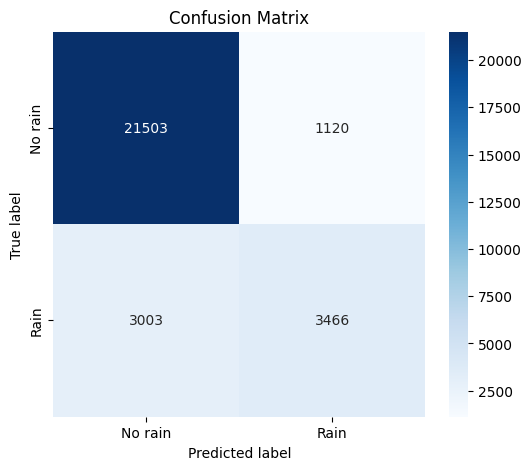

In [89]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No rain','Rain'], yticklabels=['No rain','Rain'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()